In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#load the dataset into a pandas DataFrame
df  = pd.read_csv("cardio_train.csv", delimiter=";", index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#get the size of the dataset
df.shape

(70000, 12)

In [ ]:
#reduce the size of the dataset to only 1000 samples
df = df.iloc[0:1000, :]
df.shape

(1000, 12)

In [ ]:
#convert the age given in days to years
df['age'] = df['age']//365
df['age']

id
0       50
1       55
2       51
3       48
4       47
        ..
1381    53
1383    51
1385    51
1386    47
1387    55
Name: age, Length: 1000, dtype: int64

In [ ]:
#explore the dataset
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,52.721000,1.359000,164.102000,74.734300,127.463000,92.655000,1.393000,1.241000,0.095000,0.04600,0.778000,0.507000
std,6.926408,0.479947,8.363704,15.259966,18.106918,102.072635,0.697881,0.589293,0.293362,0.20959,0.415799,0.500201
min,39.000000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,47.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,53.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,64.000000,2.000000,188.000000,200.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1000 non-null   int64  
 1   gender       1000 non-null   int64  
 2   height       1000 non-null   int64  
 3   weight       1000 non-null   float64
 4   ap_hi        1000 non-null   int64  
 5   ap_lo        1000 non-null   int64  
 6   cholesterol  1000 non-null   int64  
 7   gluc         1000 non-null   int64  
 8   smoke        1000 non-null   int64  
 9   alco         1000 non-null   int64  
 10  active       1000 non-null   int64  
 11  cardio       1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 101.6 KB


In [ ]:
#separate the dataset into target variable and features
y = df['cardio']
X = df.drop(columns=['cardio'])

In [ ]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_train[0:2]

array([[ 0.62635073,  1.3225509 ,  0.58166766, -0.05100822,  0.17838269,
        -0.21946392, -0.55284395,  2.95129145, -0.31926223, -0.22331316,
        -1.84271658],
       [ 0.33754348,  1.3225509 , -0.3726192 ,  0.5282649 ,  0.74199309,
        -0.11409806, -0.55284395,  2.95129145, -0.31926223, -0.22331316,
         0.54267705]])

In [ ]:
#implementation of the logistic regression algorithm from scratch
class LogisticRegression:
  def __init__(self, learning_rate=0.1, number_of_iterations=1000, verbose=False):
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations
    self.weights = None
    self.bias = None
    self.loss = []
    self.verbose=verbose
  
  #initialize weight and bias parameters
  def initialize_parameters(self, n): #where n is the number of features/indepedent variables 
    self.weights = np.zeros(n)
    self.bias = 0
  
  #calculate the binary cross entropy loss
  def binary_cross_entropy(self, y, y_hat):
    m = y.shape[0]
    return -(1/m) * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
  
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  
  def fit(self, X, y):
    m = X.shape[0] #number of training examples
    n = X.shape[1] #number of features/independent variables
    
    #initialize values of weights and bias
    self.initialize_parameters(n)

    for i in range(0, self.number_of_iterations):
      
      #calculate y_hat using the line equation and the sigmoid function
      z = np.dot(X, self.weights) + self.bias
      y_hat = self.sigmoid(z) + 0.00001 #adding 0.00001 to avoid 0 in the log function

      #calculate the loss
      loss = self.binary_cross_entropy(y, y_hat)
      self.loss.append(loss)

      #calculate partial derivates
      dw = (1/m)*(2*np.dot(X.T, (y_hat-y)))
      db = (1/m)*(np.sum(y_hat-y))

      #update weights and bias
      self.weights -= self.learning_rate*dw
      self.bias -= self.learning_rate*db

      if i%100 == 0 and self.verbose:
        print(f"Loss after iteration {i} is: {loss}")
  

  #calculate the prediction probabilities of the given data 
  def predict_proba(self, X):
    z = np.dot(X, self.weights) + self.bias
    return self.sigmoid(z)
  
  #predict the final outcome based on the threshold and prediction probablities calculated using the line equation and the sigmoid function
  def predict(self, X, theta=0.5): #where theta represents the threshold
    probabilities = self.predict_proba(X)
    predictions = [1 if i>theta else 0 for i in probabilities]
    return predictions

In [ ]:
#train the model
model = LogisticRegression(learning_rate=0.01, number_of_iterations=1000, verbose=True)
model.fit(X_train, y_train.values)

Loss after iteration 0 is: 0.6931472807599454
Loss after iteration 100 is: 0.5881072526548156
Loss after iteration 200 is: 0.5576437379880775
Loss after iteration 300 is: 0.544996398764833
Loss after iteration 400 is: 0.538584881833526
Loss after iteration 500 is: 0.5349354361801105
Loss after iteration 600 is: 0.5327026291893859
Loss after iteration 700 is: 0.5312690184892225
Loss after iteration 800 is: 0.5303161589133053
Loss after iteration 900 is: 0.5296658032779133


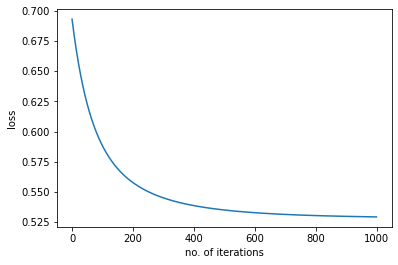

In [ ]:
#plotting loss per iteration
import matplotlib.pyplot as plt
plt.plot(range(0, len(model.loss)), model.loss)
plt.xlabel("no. of iterations")
plt.ylabel("loss")
plt.show()

In [ ]:
y_pred= model.predict(sc_X.transform(X_test))
y_pred[0:5]

[0, 1, 1, 0, 0]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.765

In [ ]:
confusion_matrix(y_test, y_pred)

array([[73, 18],
       [29, 80]])

In [ ]:
#comparison with sklearn's implementation
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(sc_X.transform(X_test))

In [ ]:
accuracy_score(y_test, preds)

0.77

In [ ]:
confusion_matrix(y_test, preds)

array([[71, 20],
       [26, 83]])